# Model 3- Elastic Net Regression

In [ ]:
def run_ElasticNet(my_data,features,indyvar):
    print("yvar is "+ str(indyvar))
    data_merge_ElasticNet = my_data.dropna()

    sel_recon_ElasticNet = features
    x = data_merge_ElasticNet.loc[:,sel_recon_ElasticNet]
    y = np.ravel(data_merge_ElasticNet.loc[:,indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    scaler = StandardScaler().fit(X_train[list_numerical])

    X_train[list_numerical] = scaler.transform(X_train[list_numerical])
    X_test[list_numerical] = scaler.transform(X_test[list_numerical])

    reg = ElasticNet(alpha=1)
    reg.fit(X_train, y_train)

    # Training data
    pred_train = reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = reg.predict(X_test)
    mse_test =mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    alphas = np.linspace(0.01,500,100)
    elasticNet = ElasticNet(max_iter=10000)
    coefs = []

    for a in alphas:
        elasticNet.set_params(alpha=a)
        elasticNet.fit(X_train, y_train)
        coefs.append(elasticNet.coef_)



    # ElasticNet with 5 fold cross-validation
    model2 = ElasticNetCV(cv=10, max_iter=10000)

    # Fit model
    model2.fit(X_train, y_train)

    print(model2.alpha_)
    elasticNet_best = ElasticNet(alpha=model2.alpha_, max_iter = 100000)
    elasticNet_best.fit(X_train, y_train)
    print(list(zip(elasticNet_best.coef_, x)))

    print('R squared training set', round(elasticNet_best.score(X_train, y_train), 2))
    print('R squared test set', round(elasticNet_best.score(X_test, y_test), 2))

    mean_squared_error(y_test, elasticNet_best.predict(X_test))

    plt.subplot(1,2,1)

    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.xlabel('alpha')
    plt.ylabel('Standardized Coefficients')
    plt.title('ElasticNet coeff as a fct of alpha');
    plt.legend(list_numerical, fontsize = 6)


    plt.subplot(1,2,2)

    plt.semilogx(model2.alphas_, model2.mse_path_, ":")
    plt.plot(
        model2.alphas_ ,
        model2.mse_path_.mean(axis=-1),
        "k",
        label="Average across the folds",
        linewidth=2,
    )
    plt.axvline(
        model2.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
    )

    plt.legend()
    plt.xlabel("alphas")
    plt.ylabel("Mean square error")
    plt.title("MSE on each fold")
    plt.axis("tight")


In [ ]:
def run_ElasticNet_and_predict(my_data,features,indyvar):
    print("yvar is "+ str(indyvar))
    data_merge_ElasticNet = my_data.dropna()

    sel_recon_ElasticNet = features
    x = data_merge_ElasticNet.loc[:,sel_recon_ElasticNet]
    y = np.ravel(data_merge_ElasticNet.loc[:,indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    scaler = StandardScaler().fit(X_train[list_numerical])

    X_train[list_numerical] = scaler.transform(X_train[list_numerical])
    X_test[list_numerical] = scaler.transform(X_test[list_numerical])

    reg = ElasticNet(alpha=1)
    reg.fit(X_train, y_train)

    # Training data
    pred_train = reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = reg.predict(X_test)
    mse_test =mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    alphas = np.linspace(0.01,500,100)
    elasticNet = ElasticNet(max_iter=10000)
    coefs = []

    for a in alphas:
        elasticNet.set_params(alpha=a)
        elasticNet.fit(X_train, y_train)
        coefs.append(elasticNet.coef_)



    # ElasticNet with 5 fold cross-validation
    model2 = ElasticNetCV(cv=10, max_iter=10000)

    # Fit model
    model2.fit(X_train, y_train)

    print(model2.alpha_)
    elasticNet_best = ElasticNet(alpha=model2.alpha_, max_iter = 100000)
    elasticNet_best.fit(X_train, y_train)
    print(list(zip(elasticNet_best.coef_, x)))

    print('R squared training set', round(elasticNet_best.score(X_train, y_train), 2))
    print('R squared test set', round(elasticNet_best.score(X_test, y_test), 2))

    mean_squared_error(y_test, elasticNet_best.predict(X_test))

    data_merge_ElasticNet = my_data.dropna()
    x = data_merge_ElasticNet.loc[:,sel_recon_ElasticNet]
    y = np.ravel(data_merge_ElasticNet.loc[:,indyvar])
    y_pred = model2.predict(x)

    return(y_pred)

## Predict grading features from shapemetrics data - ElasticNet

In [ ]:
grading_ind = ['roundness', 'tailedness', 'blockiness', 'curviness']
shapemetrics_ind = ['firstorder_count', 'tail_count','residerror_count', 'roothairs_count', 'sphereerrors_count', 'largeresiderror_count', 'area_px','length_px', 'width_px', 'weight_oz', 'length_in','width_in']
usno1 = ['deviation_from_usno1']

In [ ]:
# SELECT USER ROLE IF YOU WANT TO SPLIT IT
data_z = data_z.loc[data_z['user_role'] == "Breeder"]

yvar is ['deviation_from_usno1']
MSE training set 331.86
MSE test set 386.01
0.031925466385488335
[(4.550966141532571, 'roundness'), (9.2345788362606, 'tailedness'), (-2.0695585327143533, 'blockiness'), (12.926650806715045, 'curviness')]
R squared training set 0.54
R squared test set 0.5
yvar is ['deviation_from_usno1']
MSE training set 574.3
MSE test set 657.75
0.014440155874032452
[(-12.681988482369865, 'firstorder_count'), (2.8958814658520633, 'tail_count'), (5.6957736670578925, 'residerror_count'), (-3.160887846283416, 'roothairs_count'), (-4.3885484913822035, 'sphereerrors_count'), (-4.501119742204964, 'largeresiderror_count'), (-36.97948136863139, 'area_px'), (10.507119450984566, 'length_px'), (14.46036473035006, 'width_px'), (0.0, 'weight_oz'), (10.513088768670587, 'length_in'), (14.47562476700554, 'width_in')]
R squared training set 0.28
R squared test set 0.22
yvar is ['roundness']
MSE training set 381.67
MSE test set 418.88
0.09153742470192415
[(0.0, 'firstorder_count'), (0.8

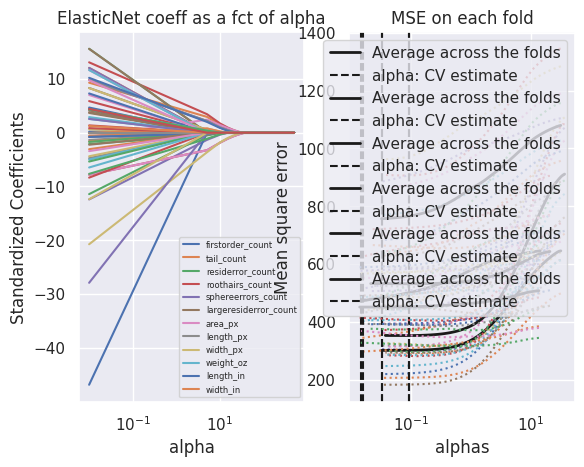

In [ ]:
# devUS#1 from grading
run_ElasticNet(my_data = data_z, features=grading_ind, indyvar= ['deviation_from_usno1'])

# devUS#1 from reconstruction
run_ElasticNet(my_data = data_z, features=shapemetrics_ind, indyvar= ['deviation_from_usno1'])

# roundness from reconstruction
run_ElasticNet(my_data = data_z, features=shapemetrics_ind, indyvar= ['roundness'])

# tailedness from reconstruction
run_ElasticNet(my_data = data_z, features=shapemetrics_ind, indyvar= ['tailedness'])

# blockiness from reconstruction
run_ElasticNet(my_data = data_z, features=shapemetrics_ind, indyvar= ['blockiness'])

# curviness from reconstruction
run_ElasticNet(my_data = data_z, features=shapemetrics_ind, indyvar= ['curviness'])

## Predict from prediction (see description)
We use ElasticNet to predict each grading feature (roundness, curviness, tailedness, blockiness) from the shapemetrics data. Then, we use those predictions to predict deviation from USNo1

In [ ]:
data_merge_z3 = data_z
data_pred2 = data_merge_z3.dropna()

data_pred2['roundness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])
data_pred2['curviness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])
data_pred2['tailedness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])
data_pred2['blockiness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['roundness']
MSE training set 381.67
MSE test set 418.88
0.09153742470192415
[(0.0, 'firstorder_count'), (0.8252687430474469, 'tail_count'), (-0.0, 'residerror_count'), (0.14799642540365626, 'roothairs_count'), (-0.10222331290045483, 'sphereerrors_count'), (-0.0, 'largeresiderror_count'), (-3.298899339563356, 'area_px'), (-8.36721730740018, 'length_px'), (8.52306285973541, 'width_px'), (-1.1715651032666814, 'weight_oz'), (-8.383372852978766, 'length_in'), (8.507169242042796, 'width_in')]
R squared training set 0.62
R squared test set 0.54
yvar is ['curviness']
MSE training set 460.03
MSE test set 599.86


<ipython-input-31-6e6460f6a0b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['roundness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])


0.01578052374628908
[(-7.729638536448438, 'firstorder_count'), (0.4808768790873903, 'tail_count'), (1.6837554442171783, 'residerror_count'), (-1.3513221319593107, 'roothairs_count'), (-3.066644952063682, 'sphereerrors_count'), (-0.0, 'largeresiderror_count'), (-9.535915183222562, 'area_px'), (3.8008005660668807, 'length_px'), (3.995199453319591, 'width_px'), (-0.127223247635387, 'weight_oz'), (3.814087217160234, 'length_in'), (4.008095680206853, 'width_in')]
R squared training set 0.13
R squared test set 0.12
yvar is ['tailedness']
MSE training set 853.13
MSE test set 826.46


<ipython-input-31-6e6460f6a0b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['curviness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])


0.031858619093590716
[(-20.748847132003018, 'firstorder_count'), (2.4096596767189737, 'tail_count'), (2.789573981695709, 'residerror_count'), (-0.0, 'roothairs_count'), (-4.761785268142882, 'sphereerrors_count'), (-4.651631777440053, 'largeresiderror_count'), (-13.956077945263097, 'area_px'), (5.4665520989125165, 'length_px'), (9.263668024359081, 'width_px'), (-7.476867436027239, 'weight_oz'), (5.479579177006863, 'length_in'), (9.2785637756105, 'width_in')]
R squared training set 0.31
R squared test set 0.25
yvar is ['blockiness']
MSE training set 538.24
MSE test set 519.33


<ipython-input-31-6e6460f6a0b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['tailedness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])


0.09081496932575382
[(9.413415014702512, 'firstorder_count'), (-0.2802977707722872, 'tail_count'), (0.0, 'residerror_count'), (0.0, 'roothairs_count'), (1.045782477696581, 'sphereerrors_count'), (0.8880456462056272, 'largeresiderror_count'), (1.300325021569547, 'area_px'), (-0.2728989467032863, 'length_px'), (0.7518990460223932, 'width_px'), (-0.0, 'weight_oz'), (-0.26606987497697376, 'length_in'), (0.7420218776069144, 'width_in')]
R squared training set 0.18
R squared test set 0.16


<ipython-input-31-6e6460f6a0b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['blockiness'] = run_ElasticNet_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['deviation_from_usno1']
MSE training set 621.14
MSE test set 705.59
0.009134072415775494
[(0.5346365344281261, 'roundness'), (-3.896183546480146, 'tailedness'), (-14.312084093060452, 'blockiness'), (-7.845294158484939, 'curviness')]
R squared training set 0.08
R squared test set 0.05


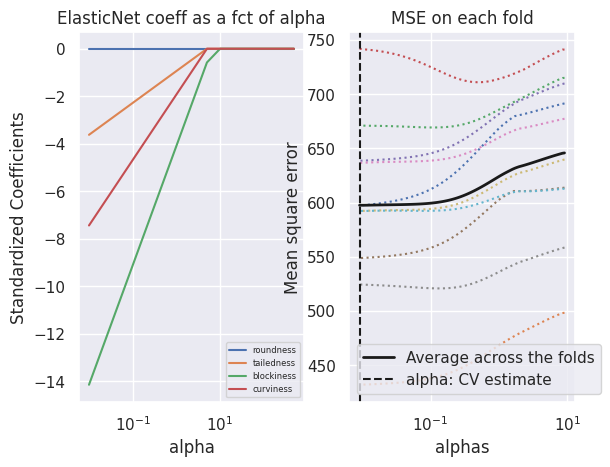

In [ ]:
run_ElasticNet(my_data = data_pred2, features=grading_ind, indyvar= ['deviation_from_usno1'])
